<a href="https://colab.research.google.com/github/Dheandralf/MachineLearning/blob/main/8thWeeksTasks/Task8_SVM_Dheandra_1103213048.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Dheandra Alfarrelwijaya
NIM : 1103213048
Kelas : TK-45-04
Lecture: 6
Dataset : heart_failure_clinical_records_dataset.csv
https://chat.openai.com/share/b3798dcc-7ab8-455c-934b-74a12069a09c

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


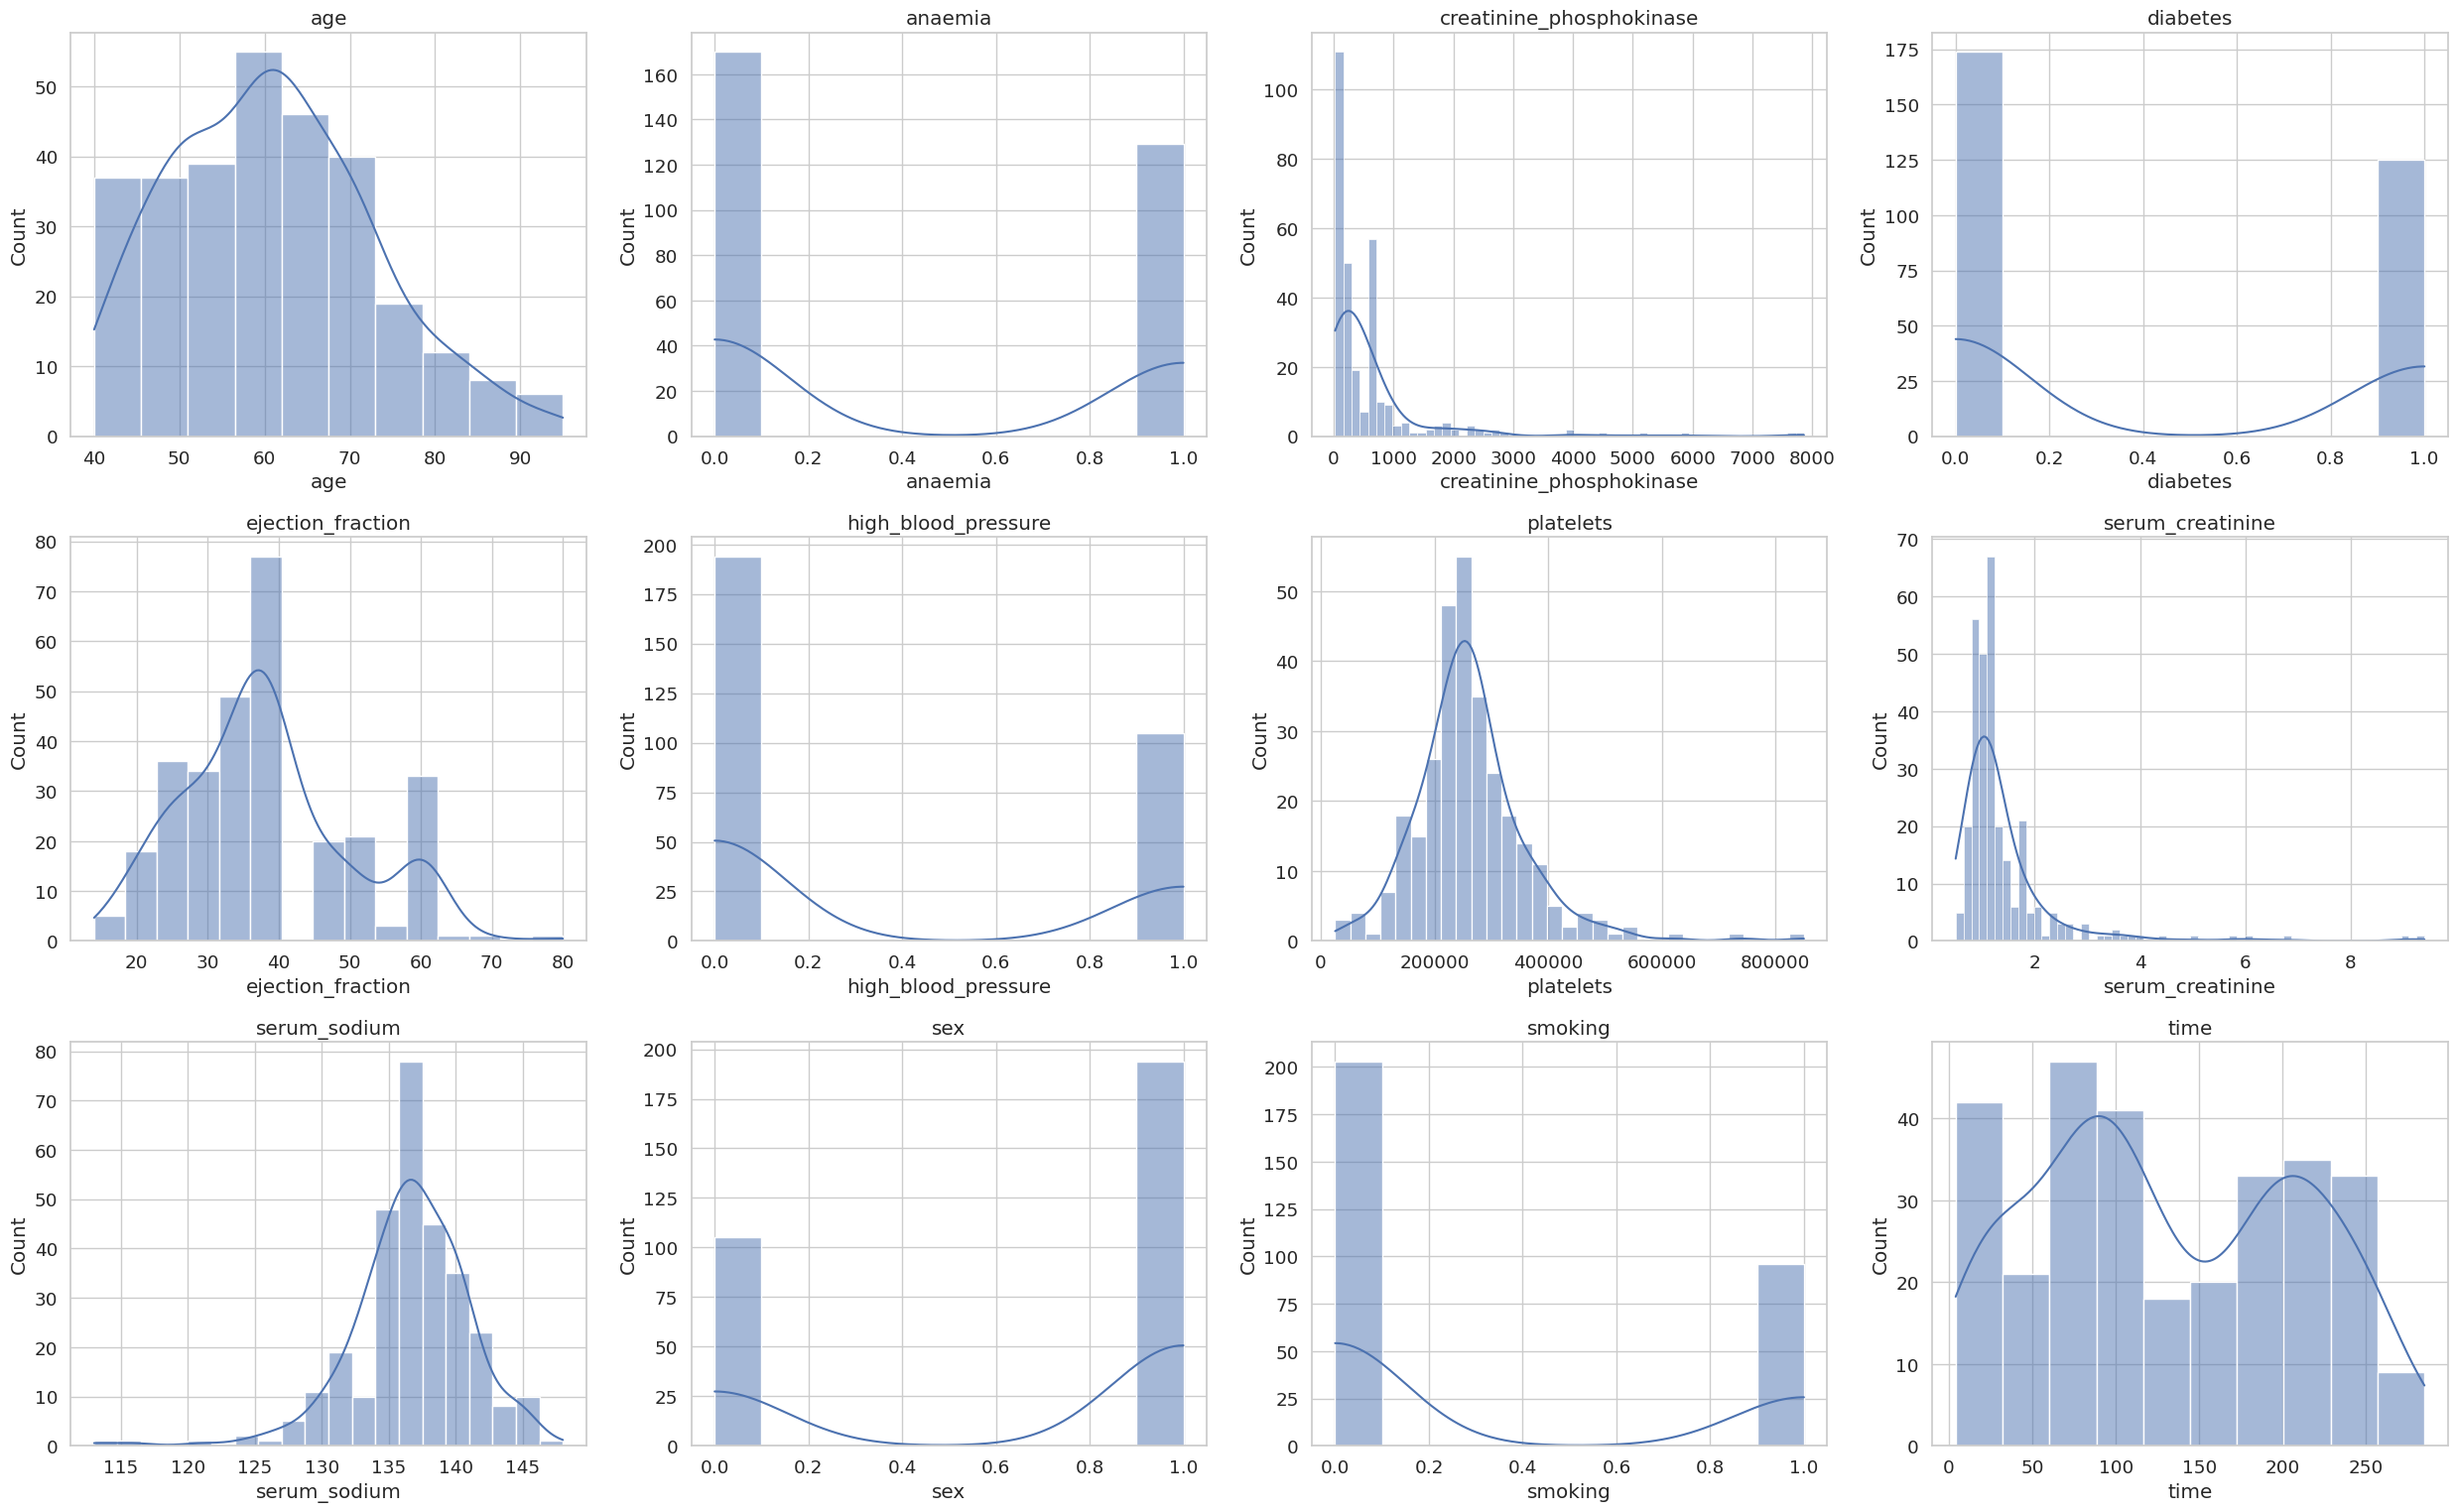

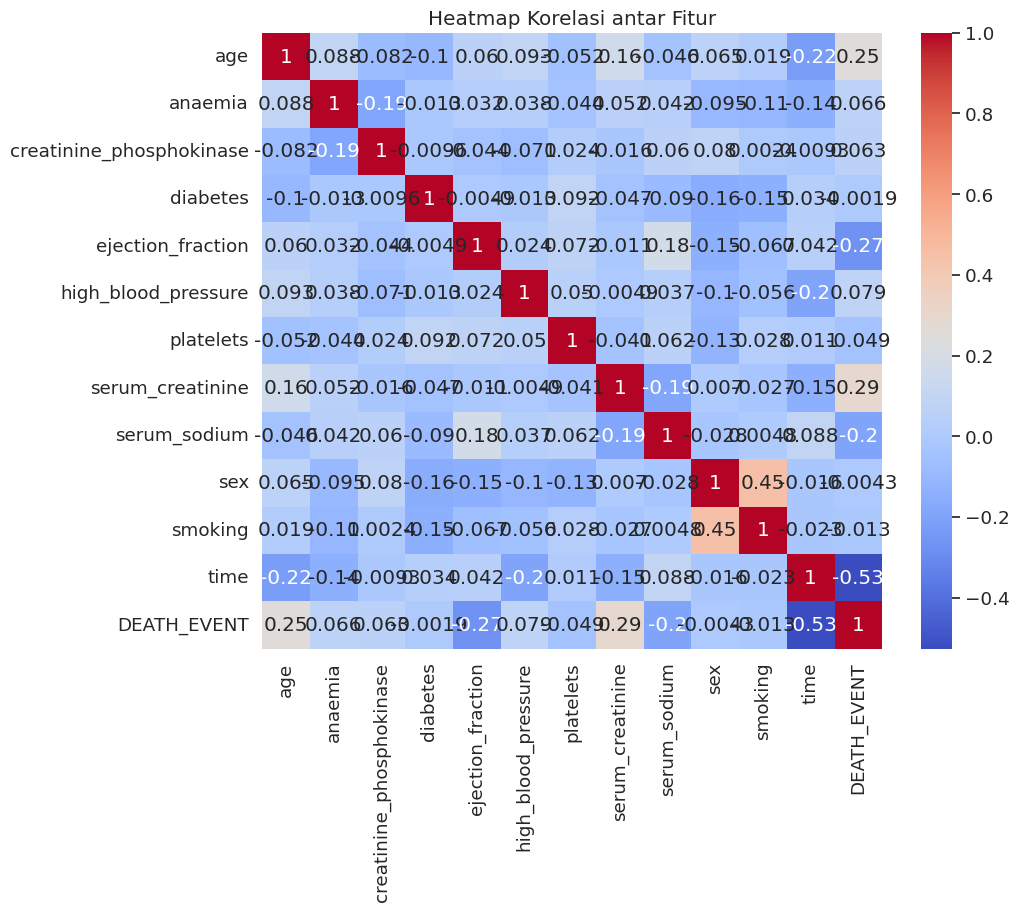

Accuracy: 0.75


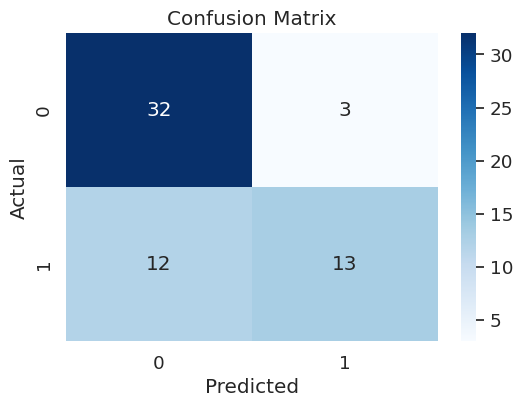

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
file_path = "/content/drive/MyDrive/dataset/heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)
# Visualisasi distribusi data setiap fitur
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(25, 20))
n_columns = 4
n_rows = (len(data.columns) - 1) // n_columns + 1
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(n_rows, n_columns, i)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

# Visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi antar Fitur')
plt.show()

# Split dataset menjadi features dan target
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
